# imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
pd.options.display.max_rows = 500

# load data

In [3]:
day = 0
market_data = pd.read_csv(f"./round_0_data/prices_round_0_day_{day}.csv", sep=";", header=0)
trade_history = pd.read_csv(f"./round_0_data/trades_round_0_day_{day}_nn.csv", sep=";", header=0)

In [4]:
market_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0
3,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
4,-1,200,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1,199700,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,0.0
3996,-1,199800,RAINFOREST_RESIN,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,0.0
3997,-1,199800,KELP,2020,21,NaN,NaN,NaN,NaN,2023,21,NaN,NaN,NaN,NaN,2021.5,0.0
3998,-1,199900,KELP,2020,32,NaN,NaN,NaN,NaN,2022,7,2023.0,2.0,2024.0,30.0,2021.0,0.0


# research

In [5]:
starfruit_data = market_data[market_data['product'] == 'KELP'].reset_index(drop=True)

In [6]:
starfruit_data['bid_volume_1'].value_counts()

bid_volume_1
1     173
27    151
29    149
26    147
30    144
24    137
22    131
25    129
23    129
28    123
21    107
31     93
2      54
32     52
4      43
20     38
3      34
6      28
5      22
34     21
33     16
35     14
7      12
8      11
36      9
37      6
19      5
39      5
18      3
17      3
40      2
9       2
16      2
38      2
10      2
12      1
Name: count, dtype: int64

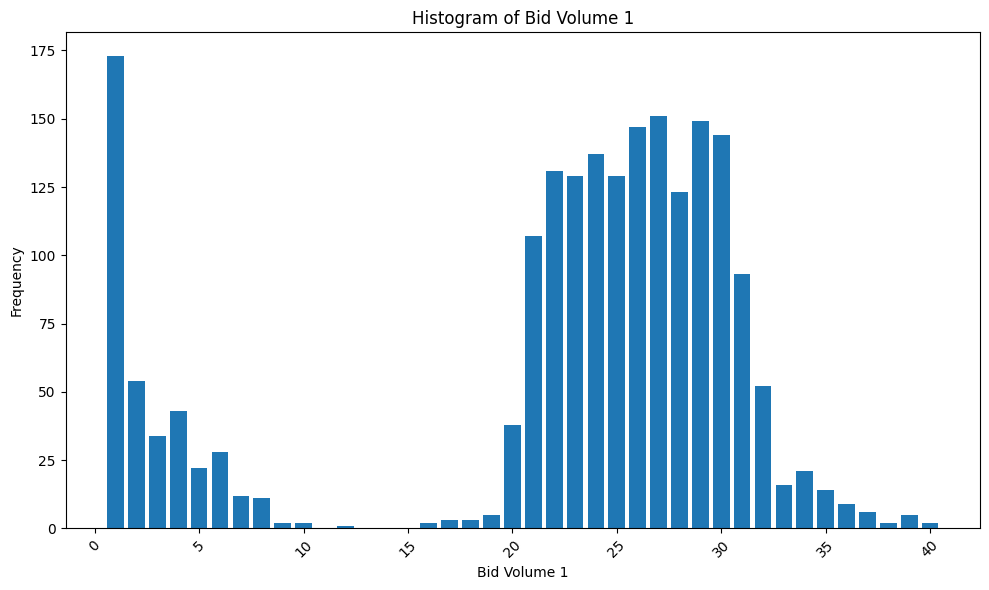

In [7]:
# Get the value counts of bid_volume_1
bid_volume_counts = starfruit_data['bid_volume_1'].value_counts()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(bid_volume_counts.index, bid_volume_counts.values)
plt.xlabel('Bid Volume 1')
plt.ylabel('Frequency')
plt.title('Histogram of Bid Volume 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

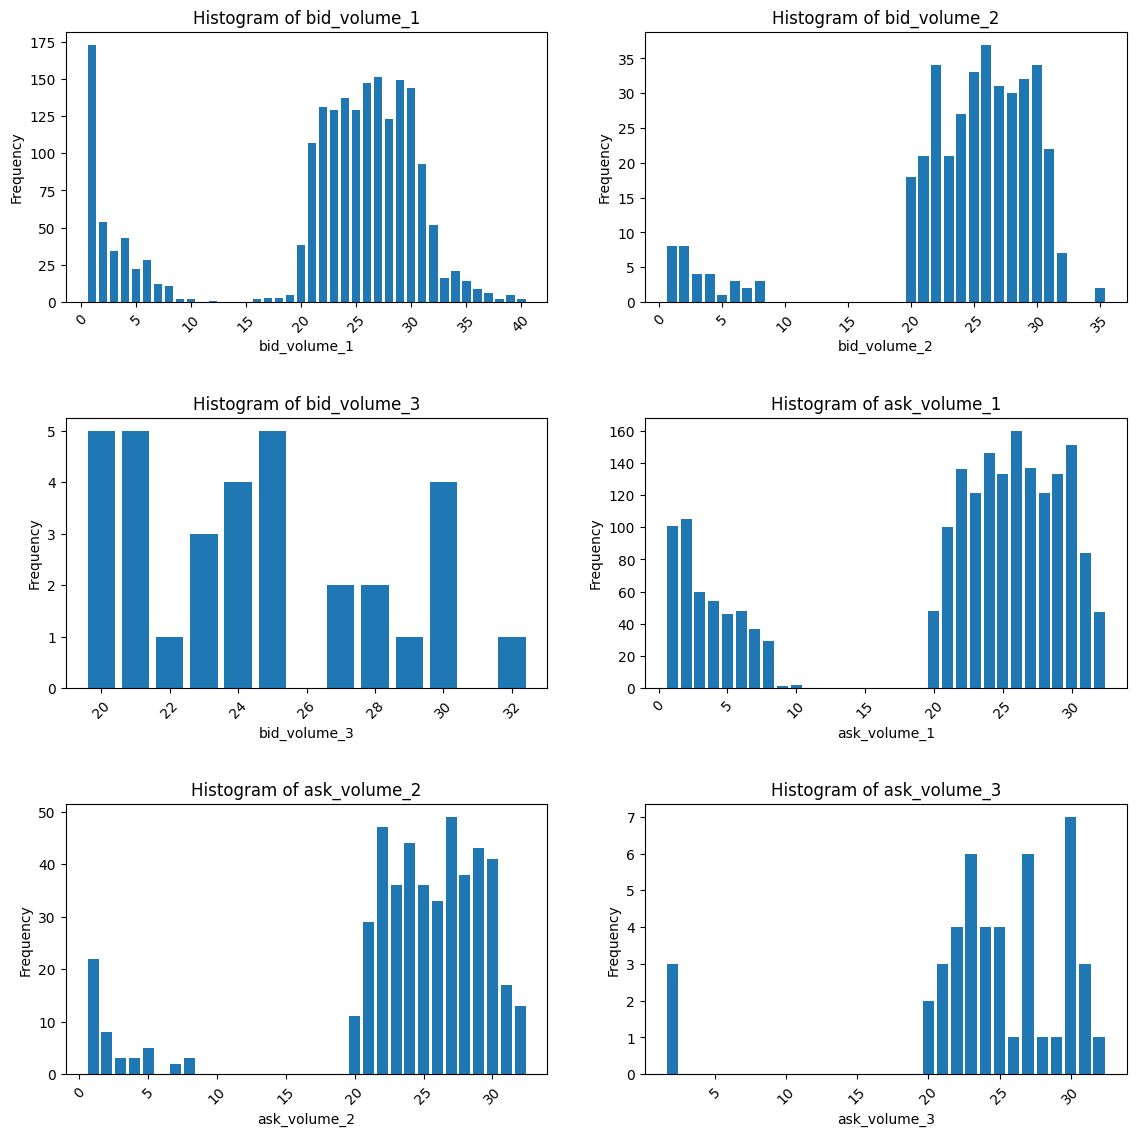

In [8]:
columns_to_plot = ['bid_volume_1', 'bid_volume_2', 'bid_volume_3',
                   'ask_volume_1', 'ask_volume_2', 'ask_volume_3']

num_plots = len(columns_to_plot)
num_rows = (num_plots + 1) // 2
num_cols = 2

plt.figure(figsize=(12, 4 * num_rows))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)
    
    volume_counts = starfruit_data[column].value_counts()
    
    plt.bar(volume_counts.index, volume_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)

plt.show()

In [26]:
def calculate_mm_mid(row):
    # Find the best bid with volume >= 20
    for i in range(1, 4):
        if row[f'bid_volume_{i}'] >= 20:
            best_bid = row[f'bid_price_{i}']
            break
    else:
        best_bid = None

    # Find the best ask with volume >= 20
    for i in range(1, 4):
        if row[f'ask_volume_{i}'] >= 20:
            best_ask = row[f'ask_price_{i}']
            break
    else:
        best_ask = None

    # Calculate the mid price if both best bid and ask are found
    if best_bid is not None and best_ask is not None:
        return (best_bid + best_ask) / 2
    else:
        return None

starfruit_data['mm_mid'] = starfruit_data.apply(calculate_mm_mid, axis=1)

In [27]:
starfruit_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,mm_mid
0,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0,2027.0
1,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0,2027.0
2,-1,200,KELP,2025,22,NaN,NaN,NaN,NaN,2028,20,NaN,NaN,NaN,NaN,2026.5,0.0,2026.5
3,-1,300,KELP,2025,31,NaN,NaN,NaN,NaN,2028,2,2029.0,29.0,NaN,NaN,2026.5,0.0,2027.0
4,-1,400,KELP,2025,27,NaN,NaN,NaN,NaN,2028,27,NaN,NaN,NaN,NaN,2026.5,0.0,2026.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1,199500,KELP,2020,23,NaN,NaN,NaN,NaN,2024,23,NaN,NaN,NaN,NaN,2022.0,0.0,2022.0
1996,-1,199600,KELP,2020,22,NaN,NaN,NaN,NaN,2023,1,2024.0,21.0,NaN,NaN,2021.5,0.0,2022.0
1997,-1,199700,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,0.0,2022.0
1998,-1,199800,KELP,2020,21,NaN,NaN,NaN,NaN,2023,21,NaN,NaN,NaN,NaN,2021.5,0.0,2021.5


In [28]:
# Create the plot using Plotly Express
fig = px.line(starfruit_data, x='timestamp', y='mm_mid', title='MM Mid Price Over Time')

# Customize the layout
fig.update_layout(
    xaxis_title='Timestamp',
    yaxis_title='MM Mid Price',
)

# Display the plot
fig.show()

In [29]:
starfruit_fair_prices = starfruit_data[['timestamp', 'mm_mid']]

In [30]:
starfruit_fair_prices = starfruit_fair_prices.rename(columns={'mm_mid': 'fair'})

In [31]:
starfruit_fair_prices

,timestamp,fair
0,0,2027.0
1,100,2027.0
2,200,2026.5
3,300,2027.0
4,400,2026.5
...,...,...
1995,199500,2022.0
1996,199600,2022.0
1997,199700,2022.0
1998,199800,2021.5


In [49]:
starfruit_fair_prices['returns'] = (starfruit_fair_prices['fair'].shift(-1) - starfruit_fair_prices['fair'])/starfruit_fair_prices['fair']
print(starfruit_fair_prices['returns'].rolling(50).std().mean())

0.00015616465149554648


In [32]:
iteration_counts = [1,2,5,10,50, 100, 500,] # we lose too much data with 1000 

In [33]:
for iterations in iteration_counts:
    starfruit_fair_prices[f"fair_in_{iterations}_its"] = starfruit_fair_prices['fair'].shift(-iterations)
    starfruit_fair_prices[f"fair_{iterations}_its_ago"] = starfruit_fair_prices['fair'].shift(iterations)

In [34]:
starfruit_fair_prices

,timestamp,fair,fair_in_1_its,fair_1_its_ago,fair_in_2_its,fair_2_its_ago,fair_in_5_its,fair_5_its_ago,fair_in_10_its,fair_10_its_ago,fair_in_50_its,fair_50_its_ago,fair_in_100_its,fair_100_its_ago,fair_in_500_its,fair_500_its_ago
0,0,2027.0,2027.0,NaN,2026.5,NaN,2026.5,NaN,2025.5,NaN,2024.5,NaN,2024.5,NaN,2021.0,NaN
1,100,2027.0,2026.5,2027.0,2027.0,NaN,2026.5,NaN,2026.0,NaN,2024.5,NaN,2024.5,NaN,2020.5,NaN
2,200,2026.5,2027.0,2027.0,2026.5,2027.0,2026.0,NaN,2026.0,NaN,2024.5,NaN,2024.0,NaN,2021.0,NaN
3,300,2027.0,2026.5,2026.5,2026.5,2027.0,2025.0,NaN,2026.0,NaN,2024.5,NaN,2023.5,NaN,2021.0,NaN
4,400,2026.5,2026.5,2027.0,2026.5,2026.5,2025.5,NaN,2026.0,NaN,2025.0,NaN,2024.0,NaN,2021.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,199500,2022.0,2022.0,2022.0,2022.0,2022.0,NaN,2021.5,NaN,2022.5,NaN,2019.5,NaN,2022.0,NaN,2014.5
1996,199600,2022.0,2022.0,2022.0,2021.5,2022.0,NaN,2021.5,NaN,2022.5,NaN,2019.5,NaN,2021.5,NaN,2014.5
1997,199700,2022.0,2021.5,2022.0,2022.0,2022.0,NaN,2021.5,NaN,2021.5,NaN,2019.5,NaN,2021.5,NaN,2014.0
1998,199800,2021.5,2022.0,2022.0,NaN,2022.0,NaN,2022.0,NaN,2022.5,NaN,2019.5,NaN,2021.5,NaN,2014.0


In [35]:
for iterations in iteration_counts:
    starfruit_fair_prices[f'returns_in_{iterations}_its'] = (starfruit_fair_prices[f'fair_in_{iterations}_its'] - starfruit_fair_prices['fair'])/starfruit_fair_prices['fair']
    starfruit_fair_prices[f'returns_from_{iterations}_its_ago'] = (starfruit_fair_prices['fair'] - starfruit_fair_prices[f'fair_{iterations}_its_ago'])/starfruit_fair_prices[f'fair_{iterations}_its_ago']

In [36]:
starfruit_fair_prices.columns

Index(['timestamp', 'fair', 'fair_in_1_its', 'fair_1_its_ago', 'fair_in_2_its',
       'fair_2_its_ago', 'fair_in_5_its', 'fair_5_its_ago', 'fair_in_10_its',
       'fair_10_its_ago', 'fair_in_50_its', 'fair_50_its_ago',
       'fair_in_100_its', 'fair_100_its_ago', 'fair_in_500_its',
       'fair_500_its_ago', 'returns_in_1_its', 'returns_from_1_its_ago',
       'returns_in_2_its', 'returns_from_2_its_ago', 'returns_in_5_its',
       'returns_from_5_its_ago', 'returns_in_10_its',
       'returns_from_10_its_ago', 'returns_in_50_its',
       'returns_from_50_its_ago', 'returns_in_100_its',
       'returns_from_100_its_ago', 'returns_in_500_its',
       'returns_from_500_its_ago'],
      dtype='object')

In [37]:
starfruit_returns = starfruit_fair_prices[['timestamp','fair','returns_in_1_its', 'returns_from_1_its_ago',
       'returns_in_2_its', 'returns_from_2_its_ago', 'returns_in_5_its',
       'returns_from_5_its_ago', 'returns_in_10_its',
       'returns_from_10_its_ago', 'returns_in_50_its',
       'returns_from_50_its_ago', 'returns_in_100_its',
       'returns_from_100_its_ago', 'returns_in_500_its',
       'returns_from_500_its_ago']]

In [38]:
starfruit_returns= starfruit_returns.dropna()

In [39]:
starfruit_returns.mean()

timestamp                   9.989014e+04
fair                        2.016885e+03
returns_in_1_its           -5.452530e-06
returns_from_1_its_ago      8.791367e-07
returns_in_2_its           -7.743108e-06
returns_from_2_its_ago     -2.563544e-06
returns_in_5_its           -1.835239e-05
returns_from_5_its_ago     -1.317681e-05
returns_in_10_its          -4.505065e-05
returns_from_10_its_ago    -2.520673e-05
returns_in_50_its          -1.199099e-04
returns_from_50_its_ago    -1.142284e-04
returns_in_100_its         -1.527281e-04
returns_from_100_its_ago   -2.522202e-04
returns_in_500_its          3.929862e-04
returns_from_500_its_ago   -1.838897e-03
dtype: float64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from tqdm import tqdm

# Perform train-test split
train_data, test_data = train_test_split(starfruit_returns, test_size=0.2, random_state=42)

# Iterate over each iteration count
for iterations in tqdm(iteration_counts):
    # Prepare the feature and target columns
    X_train = train_data[f'returns_from_{iterations}_its_ago'].values.reshape(-1, 1)
    y_train = train_data[f'returns_in_{iterations}_its']
    X_test = test_data[f'returns_from_{iterations}_its_ago'].values.reshape(-1, 1)
    y_test = test_data[f'returns_in_{iterations}_its']

    # Create and train the linear regression model
    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)

    # Make predictions on train and test data
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculate R-squared and MSE for train and test data
    train_r2 = r2_score(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    # Print the results
    print(f"Iteration Count: {iterations}")
    print(f"Learned Equation: returns_in_{iterations}_its = {model.coef_[0]:.4f} * returns_from_{iterations}_its_ago")
    print(f"Train R-squared: {train_r2:.4f}")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Test R-squared: {test_r2:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print()

100%|██████████| 7/7 [00:00<00:00, 287.66it/s]

Iteration Count: 1
Learned Equation: returns_in_1_its = -0.1843 * returns_from_1_its_ago
Train R-squared: 0.0309
Train MSE: 0.0000
Test R-squared: -0.0265
Test MSE: 0.0000

Iteration Count: 2
Learned Equation: returns_in_2_its = -0.0127 * returns_from_2_its_ago
Train R-squared: -0.0007
Train MSE: 0.0000
Test R-squared: -0.0033
Test MSE: 0.0000

Iteration Count: 5
Learned Equation: returns_in_5_its = 0.0092 * returns_from_5_its_ago
Train R-squared: -0.0029
Train MSE: 0.0000
Test R-squared: -0.0060
Test MSE: 0.0000

Iteration Count: 10
Learned Equation: returns_in_10_its = 0.0031 * returns_from_10_its_ago
Train R-squared: -0.0118
Train MSE: 0.0000
Test R-squared: -0.0048
Test MSE: 0.0000

Iteration Count: 50
Learned Equation: returns_in_50_its = -0.2220 * returns_from_50_its_ago
Train R-squared: 0.0260
Train MSE: 0.0000
Test R-squared: 0.0891
Test MSE: 0.0000

Iteration Count: 100
Learned Equation: returns_in_100_its = 0.0159 * returns_from_100_its_ago
Train R-squared: -0.0239
Train MSE:

In [40]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.1 MB 12.2 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.1 MB 14.7 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 14.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   -- ------------------------------------- 2.1/41.2 MB 10.7 MB/s eta 0:00:04
   ----- ---------------------------------- 5.8/41.2 MB 13.6 MB/s eta 0:00:03
   --------- ------------------------------ 9.7/41.2 MB 15.5 MB/s eta 0:00:03
   ----------- ---------------------------- 11.5/41.2 MB 13.6 MB/s eta 0:00:03
   ------------- -------------------------- 13.9/41.2 MB 13.4 MB/s eta 0:00:03
   ---------------- ----------------------- 17.3/41.2 MB 14.0 MB/s eta 0:00:02
   ------------------- -------------------- 19.9/41.2 MB 13.7 MB/s eta 0:00:

In [123]:
1/5000

0.0002

In [124]:
-0.2221*1/5000

-4.442e-05

In [125]:
_ * 5000

-0.2221